# Assignment 2

## Question 1a: Building a KNN classifier function

In [1]:
import pandas as pd
import numpy as np
from collections import Counter

### This is the process to ingest the training and test matrices. The matrices are already divided into separate matries and the respective labels have also been spearated.

In [2]:
#Reading the files
trainMatrix = np.loadtxt("trainMatrixModified.txt")
trainClasses = np.loadtxt("trainClasses.txt") #, sep = "\t", header = None, index_col = 0)
testMatrix = np.loadtxt("testMatrixModified.txt")
testClasses = np.loadtxt("testClasses.txt")

trm = trainMatrix.T

tem = testMatrix.T
a = tem[0]

numTerms = trm.shape[1]
NDocs = trm.shape[0]

type(testClasses)

print (testClasses.shape)

trainClasses

(200, 2)


array([[  0.,   0.],
       [  1.,   1.],
       [  2.,   0.],
       ...,
       [797.,   1.],
       [798.,   1.],
       [799.,   1.]])

#### The below is the classifier function calculate the two distances (Euclidean and Cosine Similarity). The function returns the most common label from the K-neighbors requested by the user.

In [3]:
def knn_classifier(D, x, labels, K, distType):
    if distType == 0: #Euclidean Distance
        dist = np.sqrt(((D - x)**2).sum(axis = 1))
    
    elif distType == 1: #Cosine Similarity
        #Finding the norm for the training data
        D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
        #Finding the norm of the test data
        x_norm = np.linalg.norm(x)
        #Calculating the similarity
        sim = np.dot(D,x)/(D_norm * x_norm)
        #Calculating the distance
        dist = 1 - sim
    
    #Sorting the list and getting the neighbor's lables
    idx = np.argsort(dist)
    labs = idx[:K]
    neigh_labels = labels[labs].T
    neigh_labels = neigh_labels[1]
    #Counting the K Neighbors labels associated with the sample
    count = Counter(neigh_labels)
    ##print('Labels for top ', K, ' neighbors: ', count)
    
    return count.most_common(1)[0][0]

#### Testing the function is working

In [4]:
#Running the algorithm to make sure calculations work
knn_classifier(trm, a, trainClasses, 5, 1)


1.0

## Q1b: Evaluating the KNN Classifier

### The function below ingests the training matrix, training labels, testing matrix, testing labels, number of K-Neighbors requested by the user. This runs the knn classifier for every single element in the test dataset.

In [5]:
def test_knn(D, labels, x, tlab, K, measure):
    'D is the full training dataset'
    'labels is the training labels'
    'x is the test dataset'
    'tlab is the testing labels'
    'K is the number of neighbors'
    'Measure is the choice between 0 (Euclidean Distance) or 1 (Cosine Similarity)'
    alst = [knn_classifier(D, i, labels, K, measure) for i in x]
        
    arr = np.array(alst)
    
    total = np.count_nonzero(tlab.T[1] == arr)
    
    accuracy = total/len(alst)
    return accuracy

In [6]:
test_knn(trm, trainClasses, tem, testClasses, 5, 0)

0.815

## Q1c: Iterating K neighbors 5 - 105 to test which number of neighbors provides the best classification

### The below are list comprehensions to run the KNN Test function for K values incrementing by 5. This will help evaluate the the differences between the Euclidean and 1-Cosine Similarity in prediciting the class labels.

In [7]:
elst = [test_knn(trm, trainClasses, tem, testClasses, j, 0) for j in range(5, 105, 5)]

In [8]:
clst = [test_knn(trm, trainClasses, tem, testClasses, j, 1) for j in range(5, 105, 5)]

In [9]:
klst = [i for i in range(5, 105, 5)]

df = pd.DataFrame()
df["K"] = klst
df["Euclidean Distance"] = elst
df["1 - Cosine Similarity"] = clst

df.head()

,K,Euclidean Distance,1 - Cosine Similarity
0,5,0.815,0.970
1,10,0.850,0.985
2,15,0.785,0.985
3,20,0.765,0.975
4,25,0.730,0.970


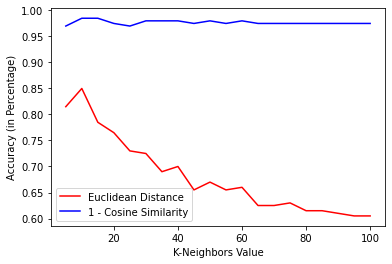

In [10]:
import matplotlib.pyplot as plt
plt.plot('K', 'Euclidean Distance', data = df, color = 'red')
plt.plot('K', '1 - Cosine Similarity', data = df, color = 'blue')
plt.xlabel('K-Neighbors Value')
plt.ylabel('Accuracy (in Percentage)')
plt.legend()

### From the above analysis, we can see a few things. First, in relation to the Cosine similarity, the prediction accuracy starts and remains high with very little change due to the K-neighbors with accuracy at 97% consistently. Secondly, we notice that the Euclidean distance's accuracy decreases as the number of K Neighbors increases. (1 - Consine similarity) is a more stable measure of distance as the accuracy remains relatively unchanged.

## Q1d: TF x IDF weights for document term frequencies

In [11]:
trm2 = pd.DataFrame(trainMatrix)
trmFreqs = trm2.sum(axis = 1)

In [12]:
import matplotlib.pyplot as plt

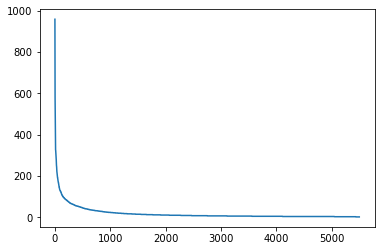

In [13]:
plt.plot(sorted(trmFreqs, reverse = True))

In [14]:
#Transforming the data into TF x IDF weights

dfreq = pd.DataFrame([(trm2 != 0).sum(1)]).T
dfreq

,0
0,50
1,7
2,10
3,800
4,108
...,...
5495,3
5496,3
5497,2
5498,2


In [15]:
#Creating a matrix with all entries as NDocs
trm2.shape

(5500, 800)

In [16]:
nmatrix = np.ones(np.shape(trm2), dtype = float)*trm2.shape[1]
#This is the number of docs

In [17]:
IDF = np.log2(np.divide(nmatrix, np.array(dfreq)))

In [18]:
td_tfidf = np.array(trm2) * IDF

In [19]:
#pd.set_option("display.precision", 2)

#The training set is in a weighted format
td_tfidf = np.array(td_tfidf)

In [20]:
#Setting the testing data to the same
x = pd.DataFrame(testMatrix) 
xdfreq = pd.DataFrame([(x != 0).sum(1)]).T
xdfreq

,0
0,15
1,0
2,1
3,200
4,26
...,...
5495,1
5496,3
5497,1
5498,1


In [21]:
nmatrix2 = np.ones(np.shape(x), dtype = float)*x.shape[1]
IDF2 = np.log2(np.divide(nmatrix2, np.array(xdfreq)))

<ipython-input-21-5db00cd38759>:2: RuntimeWarning: divide by zero encountered in true_divide
  IDF2 = np.log2(np.divide(nmatrix2, np.array(xdfreq)))


In [22]:
x_tfidf = x * IDF2
x_tfidf = x_tfidf.fillna(0.)
x_tfidf = np.array(x_tfidf)

#pd.set_option("display.precision", 2)

#The training set is in a weighted format
#x_tfidf.T[1] = np.where(x_tfidf.T[1] == np.nan,0.,0.)
#x_tfidf

In [23]:
test_knn(td_tfidf.T, trainClasses, x_tfidf.T[0], testClasses, 1, 0)

<ipython-input-5-c1089c4e2510>:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  total = np.count_nonzero(tlab.T[1] == arr)


0.0

In [24]:
glst = [test_knn(td_tfidf.T, trainClasses, x_tfidf.T, testClasses, i, 0) for i in range(5, 105, 5)]

In [25]:
plst = [test_knn(td_tfidf.T, trainClasses, x_tfidf.T, testClasses, i, 1) for i in range(5, 105, 5)]

In [26]:
klst = [i for i in range(5, 105, 5)]

df_tfidf = pd.DataFrame()
df_tfidf["K"] = klst
df_tfidf["Euclidean Distance"] = glst
df_tfidf["1 - Cosine Similarity"] = plst

df_tfidf.head()

,K,Euclidean Distance,1 - Cosine Similarity
0,5,0.800,0.970
1,10,0.750,0.990
2,15,0.615,0.995
3,20,0.665,0.995
4,25,0.605,0.990


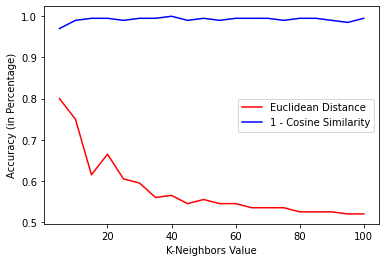

In [27]:
plt.plot('K', 'Euclidean Distance', data = df_tfidf, color = "red")
plt.plot('K', '1 - Cosine Similarity', data = df_tfidf, color = "blue")
plt.xlabel('K-Neighbors Value')
plt.ylabel('Accuracy (in Percentage)')
plt.legend()

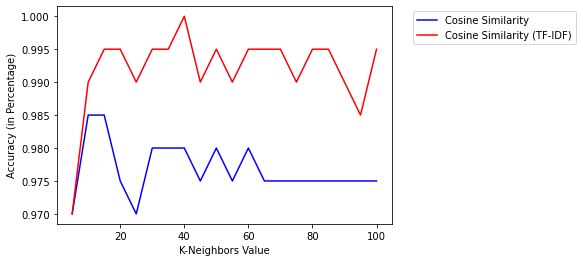

In [28]:
plt.plot('K', '1 - Cosine Similarity', data = df, color = 'blue', label = 'Cosine Similarity')
plt.plot('K', '1 - Cosine Similarity', data = df_tfidf, color = "red", label = 'Cosine Similarity (TF-IDF)')
plt.xlabel('K-Neighbors Value')
plt.ylabel('Accuracy (in Percentage)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#### The cosine similarity for the TF-IDF functions provides a higher accuracy compared to the Consine Similarity computed from the non-weighted terms. The most accurate K-neighbors seems to be between 20 - 40, however, as K reaches 10, the model gives a 99.5% accuracy. The calculations for TF-IDF require slightly more computing power for rather negligible results.

## Q1e: Rocchio Method

In [29]:
a = np.unique(trainClasses.T[1])
a

array([0., 1.])

In [30]:
td_tfidf.T.shape

(800, 5500)

In [31]:
x_tfidf.T.shape

(200, 5500)

In [32]:
#Defining function that takes in the tf-idf weighted Training Matrix and Training Labels and returns the prototypes

def rocchio_train(trainM, trainL):
    'Receive as input the Training Matrix and Training Label'
    
    'Identify the different categories'
    a = np.unique(trainClasses.T[1])
    
    'Consolidate the two matrices into on array'
    trainData = np.append(trainM, trainL, 1)
    
    'Creating two empty lists: lst is for the list comprehension'
    lst = []
    'arrlst is for the final list with the category prototypes'
    arrlst = []
    for i in a:
        'list comprehension to calculate whether or not the axes should be part of category or not'
        lst = np.array([trainM[j] for j in range(len(trainData)) if trainData[j][-1] == i])
        'calculating the column sums and adding them to a list'
        arrlst.append(np.sum(lst.T, axis = 1))
    
    'The function returns arrlst with all the prototype vectors'
    return arrlst

In [33]:
#Defining the text categorization function which takes three inputs: Training Matrix, Training Labels and x (array).

def rocchio_dist(pvectors, x):
    'calculating x_norm for cosine similarity calculation'
    x_norm = np.linalg.norm(x)
    
    m = -2
    ct = -1
    
    "The 'for' loop goes through each of the pvectors to calculate the distance"
    for i in pvectors:
        ct += 1
        #Protoype Norm
        p_norm = np.linalg.norm(i)
        #calculating similarity
        sim = np.dot(i,x)/(p_norm * x_norm)
        
        'If then to calculate whether or not similarity is high' 
        'if the similarity is high, then we get value of d gets updated'
        'else, the loop continues'
        if sim > m:
            m = sim
            d = ct
    
    return d
        

In [34]:
o = rocchio_train(td_tfidf.T, trainClasses)
len(o[0])

5500

In [35]:
def eval_rocchio(trainM, trainL, testM, testL):
    'Extracting the prototype vectros first'
    var = rocchio_train(trainM, trainL)
    
    'Consolidating an array filled with the guesses on which label a document deserves'
    evalLabels = np.array([rocchio_dist(var, i) for i in testM])

    'Calculating the accuracy of the labels'
    total = np.count_nonzero(testL.T[1] == evalLabels) / 200 * 100
    
    return total

In [36]:
a = eval_rocchio(td_tfidf.T,trainClasses,x_tfidf.T, testClasses)

In [37]:
a

98.0

#### The Rocchio Method predicted with 98% accuracy the similarity between the prototype vectors and the document vector. Compared to KNN algorithm, this did not require additional iterations of the K value and getting the K neighbors. The functions ran faster as a result.